In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../src/modeling")

import model
import metrics
import train_test
import evaluation

import os
print(os.listdir("."))

Using TensorFlow backend.


['Preprocessing.ipynb', 'Modeling.ipynb', '.ipynb_checkpoints']


In [2]:
data = pd.read_csv("../data/LendingClub/datasets/Processed.csv", index_col=0)
data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,159170615,16000.0,16000.0,16000.0,36 months,17.74%,576.36,C,C5,NaN,...,100.0,50.0,0.0,0.0,33853.0,26947.0,5500.0,28353.0,N,N
1,159210254,10000.0,10000.0,10000.0,60 months,15.24%,239.17,C,C2,banquet server,...,100.0,0.0,0.0,0.0,56504.0,29835.0,17800.0,35704.0,N,N
2,159226028,15000.0,15000.0,15000.0,60 months,14.30%,351.37,C,C1,Chief Advisor Litigation Technology Unit,...,91.4,33.3,0.0,0.0,301623.0,95559.0,45500.0,99724.0,N,N
3,159328733,24000.0,24000.0,24000.0,36 months,10.33%,778.14,B,B1,Accountant,...,90.9,0.0,0.0,0.0,383103.0,154703.0,27600.0,149226.0,N,N
4,159374118,15000.0,15000.0,15000.0,36 months,11.02%,491.23,B,B2,Teacher,...,85.7,20.0,0.0,0.0,440587.0,65451.0,22600.0,54887.0,N,N


In [3]:
data["loan_status"]

0         1
1         2
2         1
3         1
4         1
         ..
143014    1
143015    1
143016    1
143017    1
143018    1
Name: loan_status, Length: 143019, dtype: int64

In [4]:
types = data.dtypes
numerical = types[(types == float) | (types==int)]
numerical

id                              int64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
installment                   float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 83, dtype: object

In [5]:
df = train_test.feature_selection(data, numerical.index)
print(df.shape)
df.head()

(143019, 83)


,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,loan_status,dti,delinq_2yrs,fico_range_low,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,159170615,16000.0,16000.0,16000.0,576.36,0.0,1,NaN,0.0,735.0,...,0.0,0.0,100.0,50.0,0.0,0.0,33853.0,26947.0,5500.0,28353.0
1,159210254,10000.0,10000.0,10000.0,239.17,30000.0,2,36.88,0.0,775.0,...,0.0,3.0,100.0,0.0,0.0,0.0,56504.0,29835.0,17800.0,35704.0
2,159226028,15000.0,15000.0,15000.0,351.37,115000.0,1,30.88,1.0,680.0,...,0.0,3.0,91.4,33.3,0.0,0.0,301623.0,95559.0,45500.0,99724.0
3,159328733,24000.0,24000.0,24000.0,778.14,71000.0,1,11.41,1.0,670.0,...,0.0,5.0,90.9,0.0,0.0,0.0,383103.0,154703.0,27600.0,149226.0
4,159374118,15000.0,15000.0,15000.0,491.23,65000.0,1,10.40,0.0,720.0,...,0.0,2.0,85.7,20.0,0.0,0.0,440587.0,65451.0,22600.0,54887.0


In [6]:
df["loan_status"]

0         1
1         2
2         1
3         1
4         1
         ..
143014    1
143015    1
143016    1
143017    1
143018    1
Name: loan_status, Length: 143019, dtype: int64

In [9]:
df = df.dropna()
df.isnull().any().sum()

0

In [10]:
X_train, X_valid, y_train, y_valid = train_test.prepare_data(df)

Train on 86784 samples, validate on 21697 samples
Epoch 1/20
86784/86784 [==============================] - 2s 26us/sample - loss: 222683.3147 - accuracy: 0.9112 - recall: 0.4097 - precision: 0.4180 - f1: 0.4132 - val_loss: 0.8487 - val_accuracy: 0.9396 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 2/20
86784/86784 [==============================] - 2s 18us/sample - loss: 0.5947 - accuracy: 0.9420 - recall: 0.8566 - precision: 0.8566 - f1: 0.8566 - val_loss: 0.4415 - val_accuracy: 0.9396 - val_recall: 0.9396 - val_precision: 0.9396 - val_f1: 0.9396
Epoch 3/20
86784/86784 [==============================] - 2s 18us/sample - loss: 0.3788 - accuracy: 0.9420 - recall: 0.9420 - precision: 0.9420 - f1: 0.9420 - val_loss: 0.3407 - val_accuracy: 0.9396 - val_recall: 0.9396 - val_precision: 0.9396 - val_f1: 0.9396
Epoch 4/20
86784/86784 [==============================] - 2s 20us/sample - loss: 0.3141 - accuracy: 0.9420 - recall: 0.9420 - precision: 0.9420 - f1: 

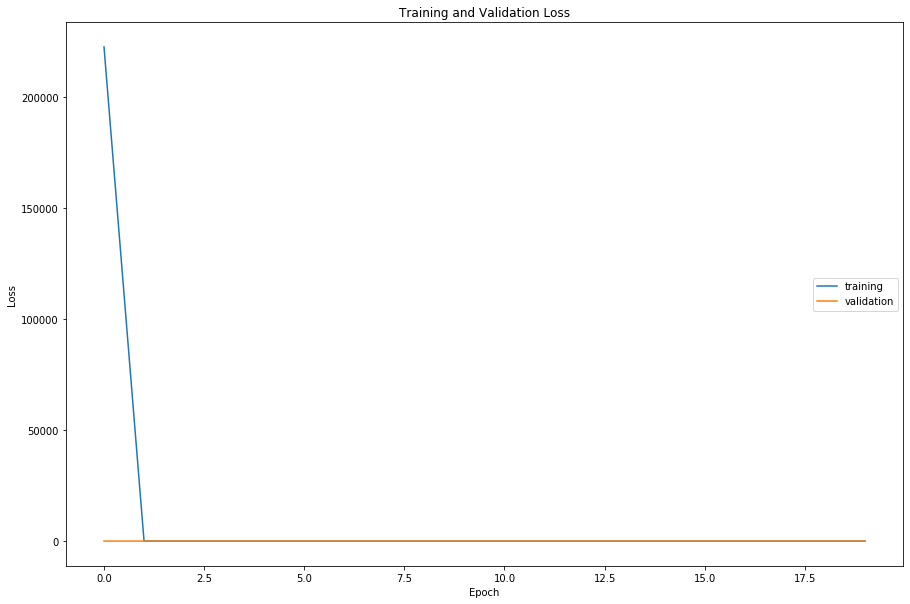

In [11]:
BATCH_SIZE = 100
EPOCHS = 20

model.build_train_nn(X_train, y_train, X_valid, y_valid, EPOCHS, BATCH_SIZE)